In [1]:
lang_conp = "../../weights/linearity/lsr/language_en_fr_layer26_Layer{i}.pt"
safe_conp = "../../weights/linearity/lsr/safety_layer26_Layer{i}.pt"
random_conp = "../../weights/linearity/lsr/random_layer26_Layer{i}_Layer-1.pt"

In [2]:
import torch

# Load language concept results
lang_results = []
for i in range(26):
    lang_results.append(torch.load(lang_conp.format(i=i)))
safe_results = []
for i in range(26):
    safe_results.append(torch.load(safe_conp.format(i=i)))
random_results = []
for i in range(26):
    random_results.append(torch.load(random_conp.format(i=i)))

print(f"Loaded {len(lang_results)} language concept results")
print(f"Loaded {len(safe_results)} safety concept results")
print(f"Loaded {len(random_results)} random concept results")



Loaded 26 language concept results
Loaded 26 safety concept results
Loaded 26 random concept results


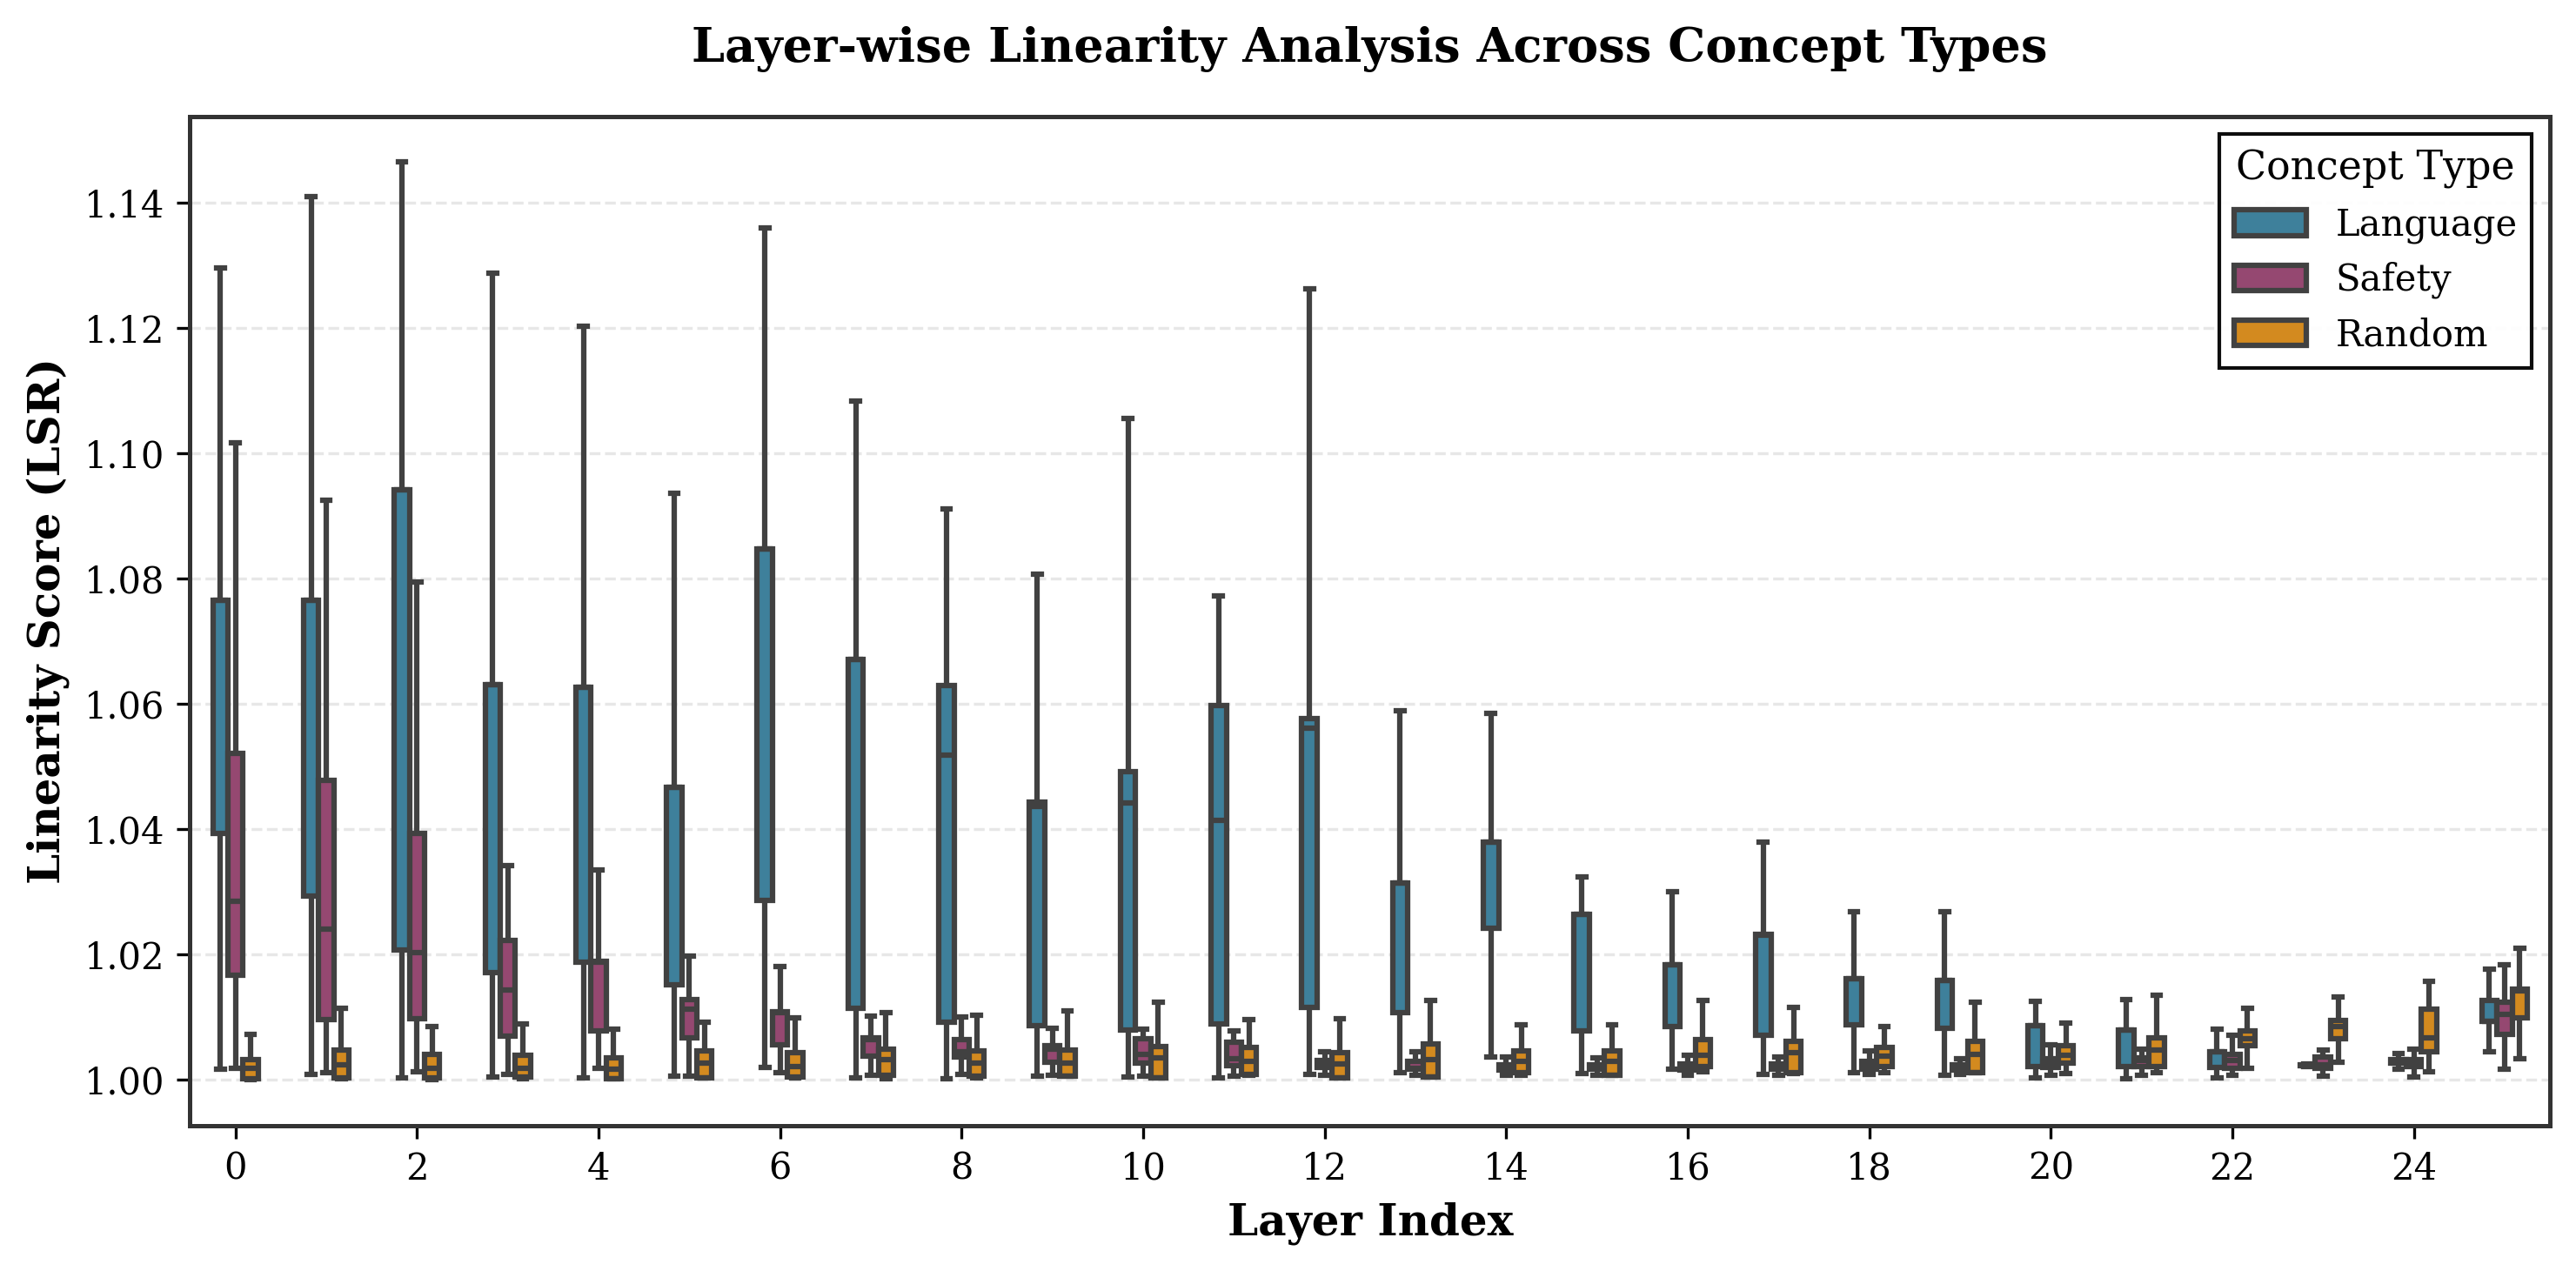

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Set publication-quality style
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 13
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 13
plt.rcParams['axes.linewidth'] = 1.2
plt.rcParams['grid.linewidth'] = 0.8
plt.rcParams['lines.linewidth'] = 2

# Prepare data for plotting
data = []
for i, (lang_val, safe_val, random_val) in enumerate(zip(lang_results, safe_results, random_results)):
    # Each tensor contains multiple values, so we need to flatten them
    for val in lang_val.flatten():
        data.append({'layer': i, 'value': val.item(), 'concept': 'Language'})
    for val in safe_val.flatten():
        data.append({'layer': i, 'value': val.item(), 'concept': 'Safety'})
    for val in random_val.flatten():
        data.append({'layer': i, 'value': val.item(), 'concept': 'Random'})

df = pd.DataFrame(data)

# Create publication-quality figure
fig, ax = plt.subplots(figsize=(10, 5), dpi=300)

# Define a sophisticated color palette
colors = {
    'Language': '#2E86AB',  # Professional blue
    'Safety': '#A23B72',     # Deep magenta
    'Random': '#F18F01'      # Warm orange
}

# Create box plot for statistical clarity
bp = sns.boxplot(
    data=df, 
    x='layer', 
    y='value', 
    hue='concept',
    palette=colors,
    width=0.5,
    linewidth=1.5,
    fliersize=2,
    ax=ax,
    showfliers=False
)

# Enhance grid
ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.8, axis='y')
ax.set_axisbelow(True)

# Labels and title
ax.set_xlabel('Layer Index', fontweight='bold')
ax.set_ylabel('Linearity Score (LSR)', fontweight='bold')
ax.set_title('Layer-wise Linearity Analysis Across Concept Types', 
             fontweight='bold', pad=15)

# Improve legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:3], labels[:3], 
          title='Concept Type', 
          frameon=True, 
          fancybox=False,
          shadow=False,
          framealpha=0.95,
          edgecolor='black',
          loc='upper right')

# Adjust x-axis ticks for readability
ax.set_xticks(range(0, len(lang_results), 2))
ax.set_xticklabels(range(0, len(lang_results), 2))

# Add subtle spine styling
for spine in ax.spines.values():
    spine.set_linewidth(1.2)
    spine.set_color('#333333')

plt.tight_layout()
plt.show()


In [4]:
# Load LSS results
lang_conp = "../../weights/linearity/lss/language_en_fr_layer26_Layer{i}.pt"
safe_conp = "../../weights/linearity/lss/safety_layer26_Layer{i}_Layer-1.pt"
random_conp = "../../weights/linearity/lss/random_layer26_Layer{i}_Layer-1.pt"
lang_results = []
for i in range(26):
    lang_results.append(torch.load(lang_conp.format(i=i)))
safe_results = []
for i in range(26):
    safe_results.append(torch.load(safe_conp.format(i=i)))
random_results = []
for i in range(26):
    random_results.append(torch.load(random_conp.format(i=i)))

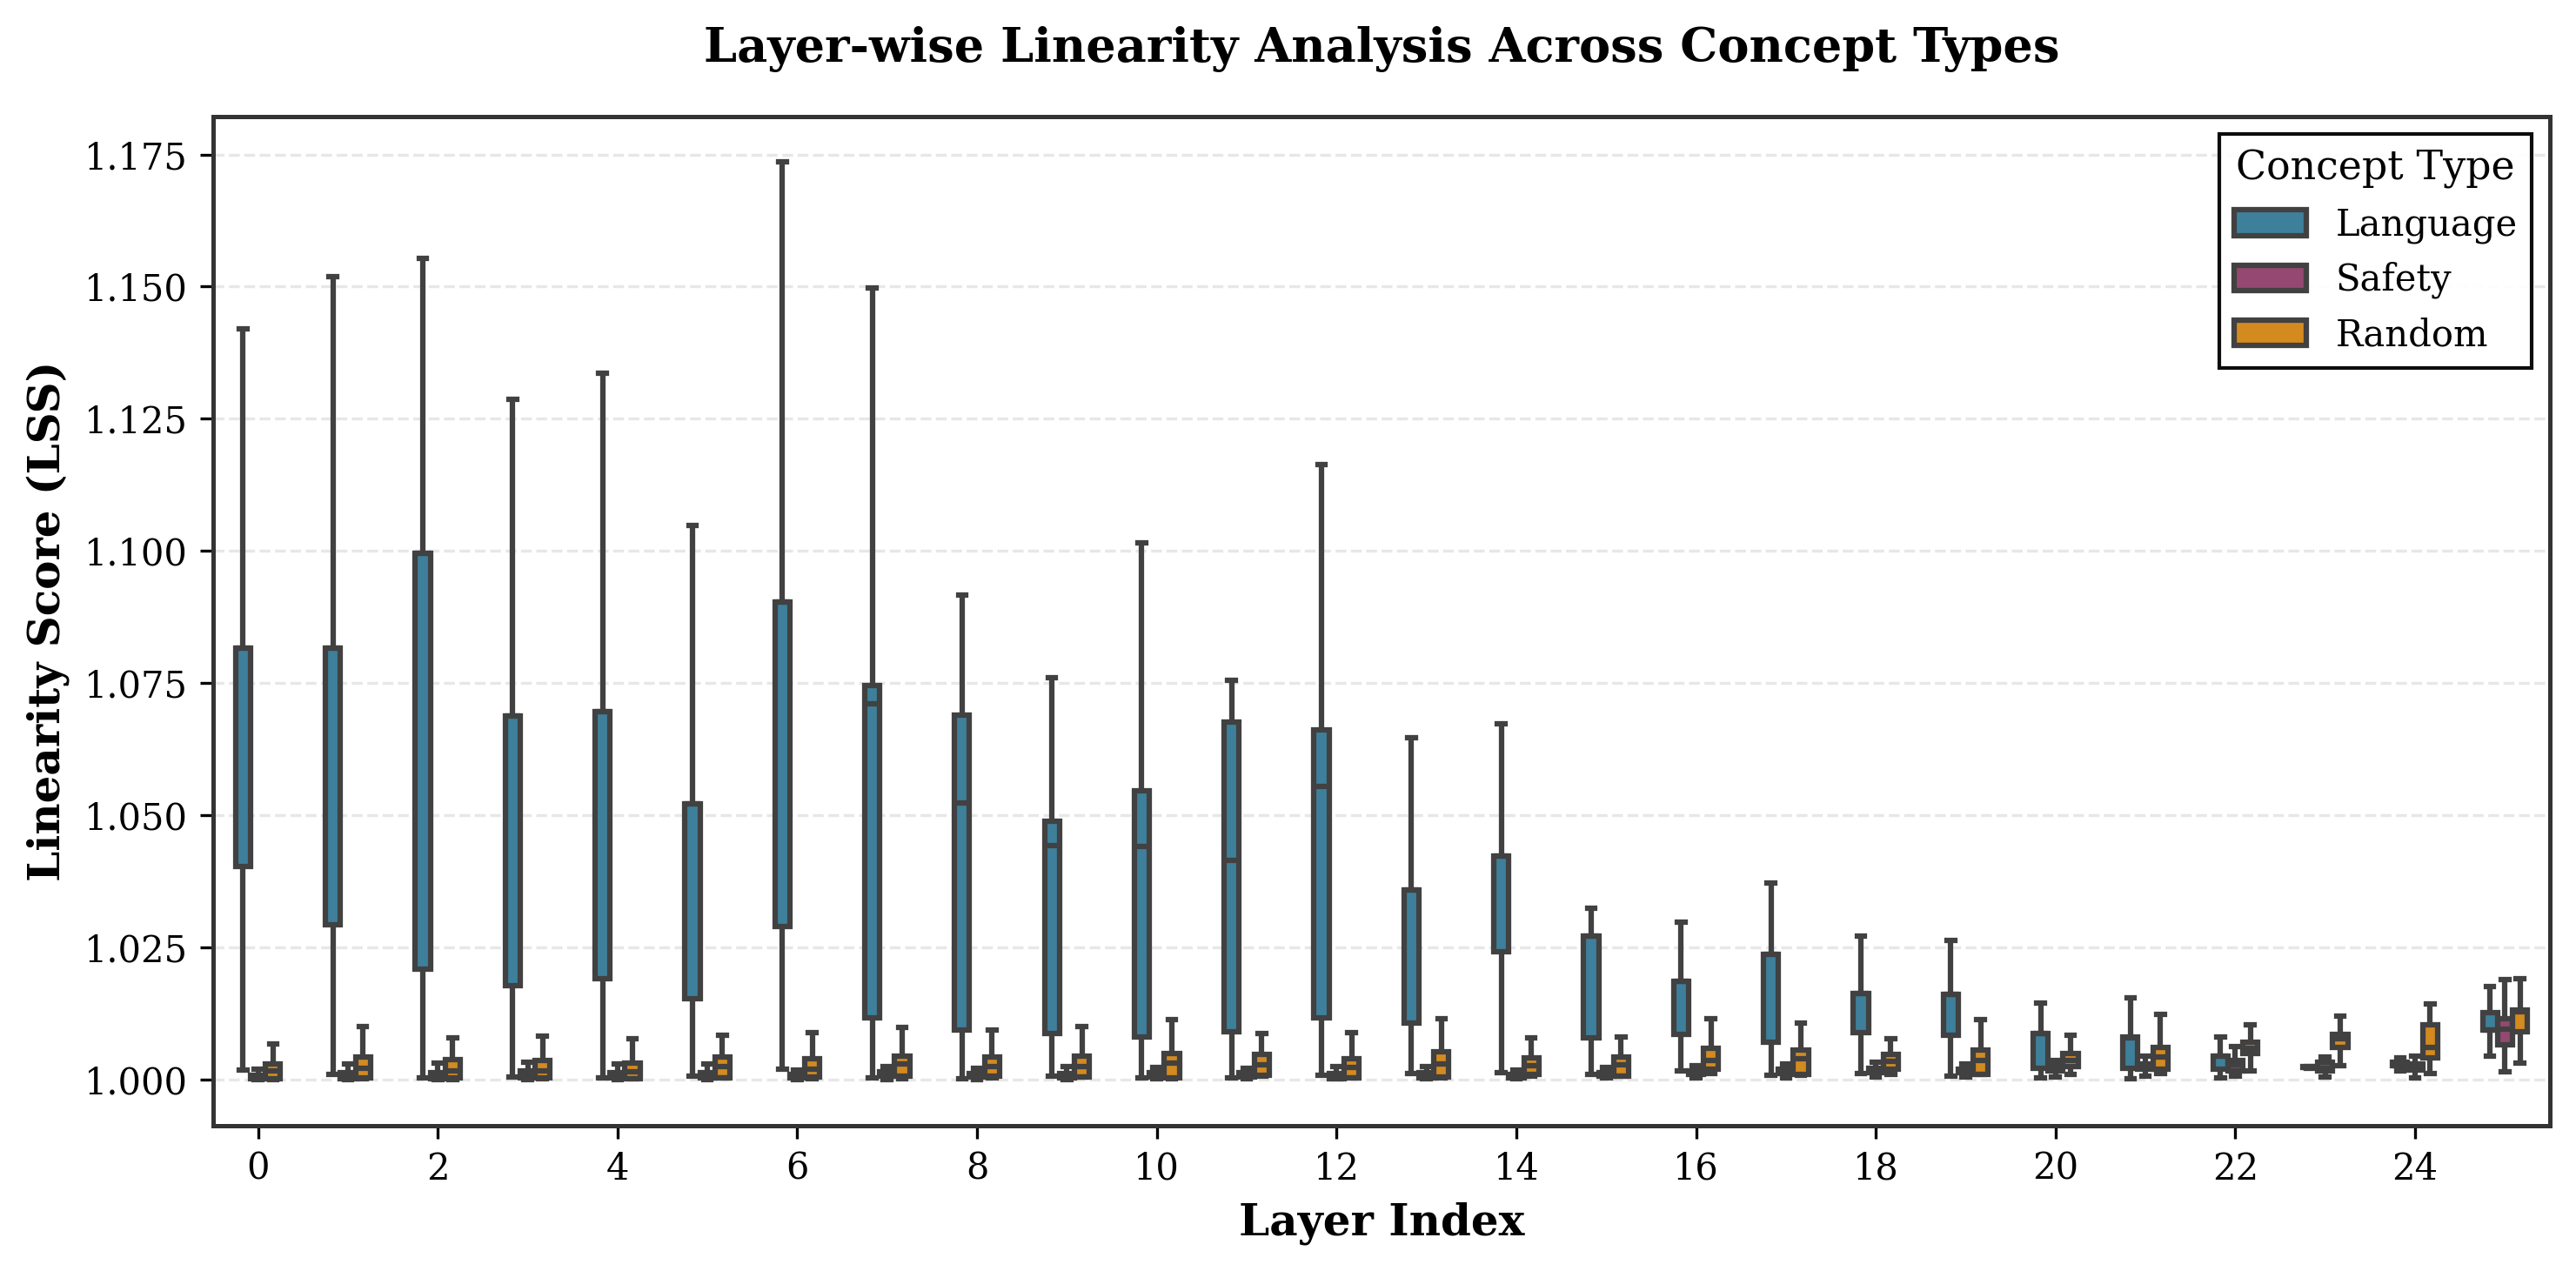

In [5]:
# Set publication-quality style
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 13
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 13
plt.rcParams['axes.linewidth'] = 1.2
plt.rcParams['grid.linewidth'] = 0.8
plt.rcParams['lines.linewidth'] = 2

# Prepare data for plotting
data = []
for i, (lang_val, safe_val, random_val) in enumerate(zip(lang_results, safe_results, random_results)):
    # Each result is a list, so we iterate directly
    for val in lang_val:
        data.append({'layer': i, 'value': val.item() if hasattr(val, 'item') else val, 'concept': 'Language'})
    for val in safe_val:
        data.append({'layer': i, 'value': val.item() if hasattr(val, 'item') else val, 'concept': 'Safety'})
    for val in random_val:
        data.append({'layer': i, 'value': val.item() if hasattr(val, 'item') else val, 'concept': 'Random'})

df = pd.DataFrame(data)

# Create publication-quality figure
fig, ax = plt.subplots(figsize=(10, 5), dpi=300)

# Define a sophisticated color palette
colors = {
    'Language': '#2E86AB',  # Professional blue
    'Safety': '#A23B72',     # Deep magenta
    'Random': '#F18F01'      # Warm orange
}

# Create box plot for statistical clarity
bp = sns.boxplot(
    data=df, 
    x='layer', 
    y='value', 
    hue='concept',
    palette=colors,
    width=0.5,
    linewidth=1.5,
    fliersize=2,
    ax=ax,
    showfliers=False
)

# Enhance grid
ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.8, axis='y')
ax.set_axisbelow(True)

# Labels and title
ax.set_xlabel('Layer Index', fontweight='bold')
ax.set_ylabel('Linearity Score (LSS)', fontweight='bold')
ax.set_title('Layer-wise Linearity Analysis Across Concept Types', 
             fontweight='bold', pad=15)

# Improve legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:3], labels[:3], 
          title='Concept Type', 
          frameon=True, 
          fancybox=False,
          shadow=False,
          framealpha=0.95,
          edgecolor='black',
          loc='upper right')

# Adjust x-axis ticks for readability
ax.set_xticks(range(0, len(lang_results), 2))
ax.set_xticklabels(range(0, len(lang_results), 2))

# Add subtle spine styling
for spine in ax.spines.values():
    spine.set_linewidth(1.2)
    spine.set_color('#333333')

plt.tight_layout()
plt.show()
